# Goodreads Data Analysis 
by Shivani Bhakta, Payal Singh, Yichen Zhang, and Wenda Chen


# LANGUAGE VS NUMBER OF BOOKS 
##### QUESTION: What language is most popular among goodreads readers?
##### Answer : English is the most popular language, about 90% of the books are in English and the second most popular language is German

In [4]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

def lan_vs_num(x):
    '''
    purpose: Takes a column of the languages plots a bar plot with languages and 
    number of books, excluding english and plot a pie chart with english and other languages.  

    :param x: input pd.series object 
    :type x: pd.core.series.Series

    return: None
    '''

    language_list = list(', '.join(x.array).split(','))
    language_list = list(set(language_list))

    counters  = []
    dic = {}
    for lan in language_list: 
        counters.append(', '.join(x.array).split(',').count(lan))

    
    Summ = 0
    for i in range(len(counters)-1):
        Summ  = Summ + counters[i]

    #remove eng from the list.
    for i in range(len(language_list)-1):
        if language_list[i] == ' eng':
            m = language_list.pop(i) #m = eng 
            n = counters.pop(i)  #n = # of eng books 
    
    Summ = Summ - n #subtract Summ of all books with number of eng books
    sizes = [n, Summ] #suzesfor pie chart
    labels = 'English', 'Other' #labels for pie chart

    colors = ['darkred', 'lightcoral']
    explode = (0, 0.1)
    # Plot
    plt.figure()
    plt.pie(sizes, explode = explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)
    plt.axis('equal')

    plt.figure()

    #graph the histogram without English
    y_pos = np.arange(len(language_list))
    #print("y_pos= ", y_pos)
    plt.bar(y_pos, counters, align='center', alpha=0.5)
    plt.xticks(y_pos, language_list, rotation=90)
    plt.ylabel('this is counters')
    plt.title('Language vs number of books')
    plt.show()

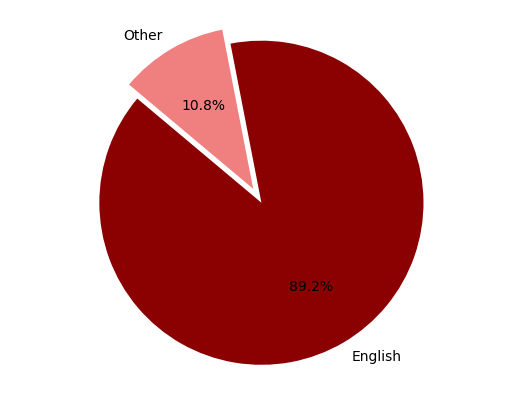

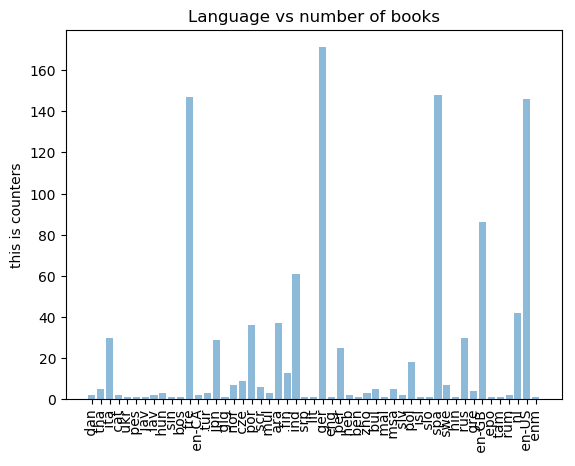

In [5]:
if __name__ == '__main__':
    data = pd.read_csv("datav3.csv")
    a = data['language']
    lan_vs_num(a)

# Rating distribution & correlation 
##### QUESTION: What is the rating distribution for the books? What's the preference of readers to give ratings?
##### Answer : Majority of the ratings lie near 3.7-4.3, approximately. Books having scores near 5 are extremely rare.

In [2]:
%matplotlib inline  
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

/Users/yichenzhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


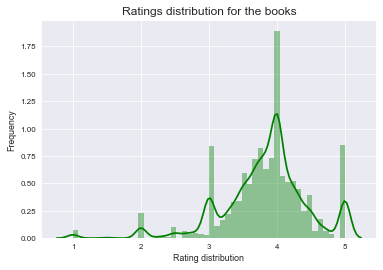

In [32]:
fig, ax = plt.subplots()
sns.set() 
def rate_distribution(x):
    '''
    purpose: plots a histogram to show the rating distribution for the books. 
    :param x: input average rating of the books 
    :type x: data
    '''
    sns.distplot(x['rating'],color="g")
    ax.set_xlabel('Rating distribution')
    ax.set_ylabel('Frequency')
    plt.title('Ratings distribution for the books')

data = pd.read_csv("datav3.csv")
rate_distribution(data)

In [4]:
data = pd.read_csv("datav3.csv")
def segregation(x):
    '''
    purpose: segragate the ratings for the books to 5 intervals. 
    :param x: input data 
    :type x: data
    '''
    values = []
    for val in x.rating:
        if  val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values

10239


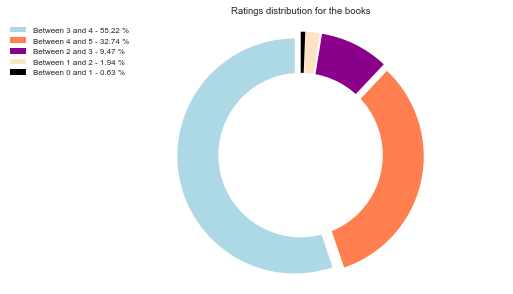

In [31]:
data = pd.read_csv("datav3.csv")
def rating_pie(data):
    '''
    purpose: plot a pie chart of ratings distribution for the books . 
    :param x: input data 
    :type x: data
    '''
    data['rating'] = segregation(data)
    ratings_pie = data['rating'].value_counts().reset_index()
    labels = ratings_pie['index']
    colors = ['lightblue','coral','darkmagenta','bisque', 'black']
    percent = 100.*ratings_pie['rating']/ratings_pie['rating'].sum()
    fig, ax1 = plt.subplots()
    ax1.pie(ratings_pie['rating'],colors = colors, 
            pctdistance=0.85, startangle=90, explode=(0.05, 0.05, 0.05, 0.05, 0.05))
    #Draw a circle now:
    centre_circle = plt.Circle((0,0), 0.70, fc ='white')
    fig1 = plt.gcf()
    fig1.gca().add_artist(centre_circle)
    #Equal Aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')
    plt.tight_layout()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
    plt.title('Ratings distribution for the books')
    plt.legend( labels, loc = 'best',bbox_to_anchor=(0.1, 1.),)
rating_pie(data)

# Ratings VS Review counts, Ratings VS Number of pages, Ratings VS Ratings count. 
##### QUESTION: Are there any factors that influence ratings. What's the relationship between ratings and other figures?
##### Answer :
It can be observed that the majority of text reviews for books still lie under 1000, making this whole scenario inconclusive. There might be a relationship, but the reviews seem to be predominant amongst books with decent ratings. Perhaps they are all scam reviews, or the density of the books in that field are just that more.

We can see that there can be a potential relationship between the average rating and ratings count. As the number of ratings increase, the rating for the book seems to taper towards 4. The average rating seems to become sparse while the number keeps on decreasing.

We can infer that the highest ratings ever given, usually are for books with the page range of 200-400, peaking near 250. It could lead to the fact that most of the people seem to prefer books with a moderate amount of pages, and that thicker books seems to scare people away.

/Users/yichenzhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yichenzhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1080x720 with 0 Axes>

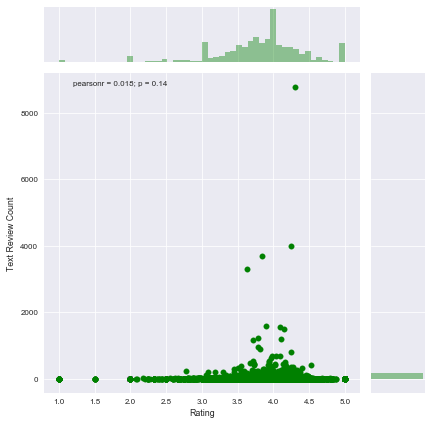

In [6]:
data = pd.read_csv("datav3.csv")
def reviews_rating(data):
    '''
    Checking for any relation between text_reviews_count and ratings.
    '''
    plt.figure(figsize=(15,10))
    data.dropna(0, inplace=True)
    sns.set_context('paper')
    ax =sns.jointplot(x="rating",y='text_reviews_count', kind='scatter',  data= data[['text_reviews_count', 'rating']],color='g')
    ax.set_axis_labels("Rating", "Text Review Count")
    plt.show()    
reviews_rating(data)

/Users/yichenzhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yichenzhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1080x720 with 0 Axes>

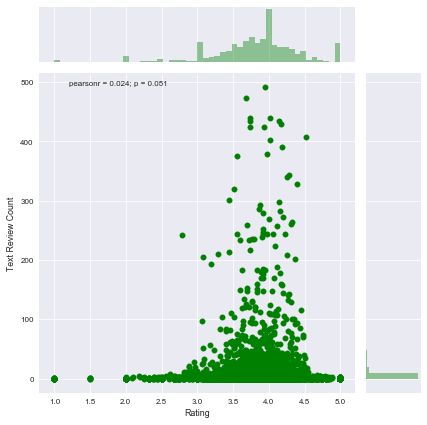

In [8]:
data = pd.read_csv("datav3.csv")
def reviews_rating2(data):
    '''
    Checking for any relation between text_reviews_count and ratings.
    '''
    plt.figure(figsize=(15,10))
    data.dropna(0, inplace=True)
    sns.set_context('paper')
    trial =data[~(data['text_reviews_count']>500)]
    ax =sns.jointplot(x="rating",y='text_reviews_count', kind='scatter',  data= trial, color='g')
    ax.set_axis_labels("Rating", "Text Review Count") 
    plt.show()
reviews_rating2(data)

/Users/yichenzhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yichenzhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1080x720 with 0 Axes>

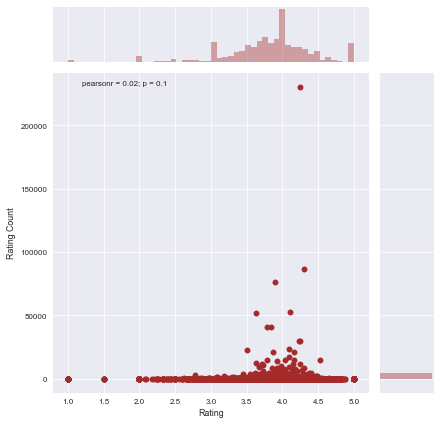

In [9]:
data = pd.read_csv("datav3.csv")
def rat_counts_rating(data):
    '''
    Checking for any relation between ratings_count and ratings.
    '''
    plt.figure(figsize=(15,10))
    data.dropna(0, inplace=True)
    sns.set_context('paper')
    ax =sns.jointplot(x="rating",y='ratings_count', kind='scatter',  data= data[['ratings_count', 'rating']],color='brown')
    ax.set_axis_labels("Rating", "Rating Count")
    plt.show()
rat_counts_rating(data)

/Users/yichenzhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yichenzhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1080x720 with 0 Axes>

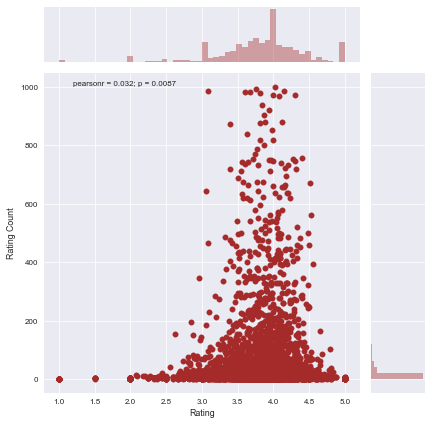

In [10]:
data = pd.read_csv("datav3.csv")
def rat_counts_rating2(data):
    '''
    Checking for any relation between ratings_count and ratings.
    '''
    plt.figure(figsize=(15,10))
    data.dropna(0, inplace=True)
    sns.set_context('paper')
    trial = data[~(data['ratings_count']>1000)]
    ax =sns.jointplot(x="rating",y='ratings_count', kind='scatter',  data= trial,color='brown')
    ax.set_axis_labels("Rating", "Rating Count")
    plt.show()
rat_counts_rating2(data)

/Users/yichenzhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yichenzhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1080x720 with 0 Axes>

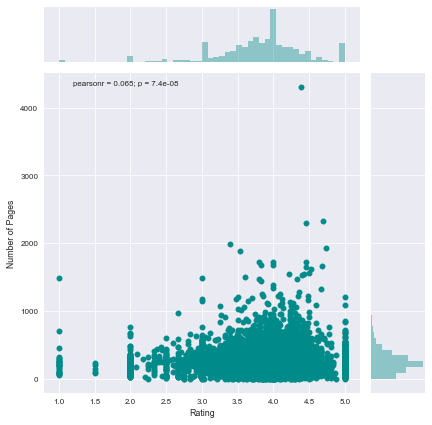

In [11]:
data = pd.read_csv("datav3.csv")
def pages_rating(data):
    '''
    Checking for any relation between num_pages and ratings.
    '''
    plt.figure(figsize=(15,10))
    data.dropna(0, inplace=True)
    sns.set_context('paper')
    ax =sns.jointplot(x="rating",y='num_pages', kind='scatter',  data= data[['num_pages', 'rating']], color='darkcyan')
    ax.set_axis_labels("Rating", "Number of Pages")
    plt.show()
pages_rating(data)

/Users/yichenzhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yichenzhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1080x720 with 0 Axes>

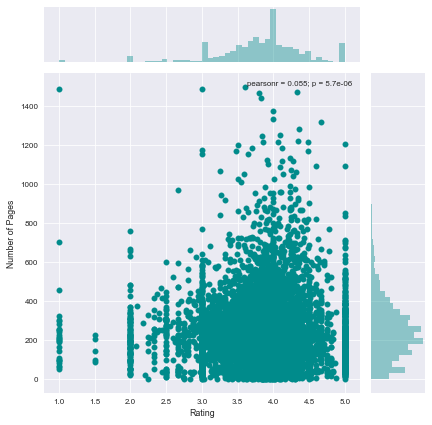

In [28]:
data = pd.read_csv("datav3.csv")
def pages_rating2(data):
    '''
    Checking for any relation between num_pages and ratings.
    '''
    plt.figure(figsize=(15,10))
    data.dropna(0, inplace=True)
    sns.set_context('paper')
    trial = data[~(data['num_pages']>1500)]
    ax =sns.jointplot(x="rating",y='num_pages', kind='scatter',  data=trial, color='darkcyan')
    ax.set_axis_labels("Rating", "Number of Pages")
    plt.show()
pages_rating2(data)

# Books with the highest reviews
##### QUESTION: Which are the books with the highest reviews? 
##### Answer : 

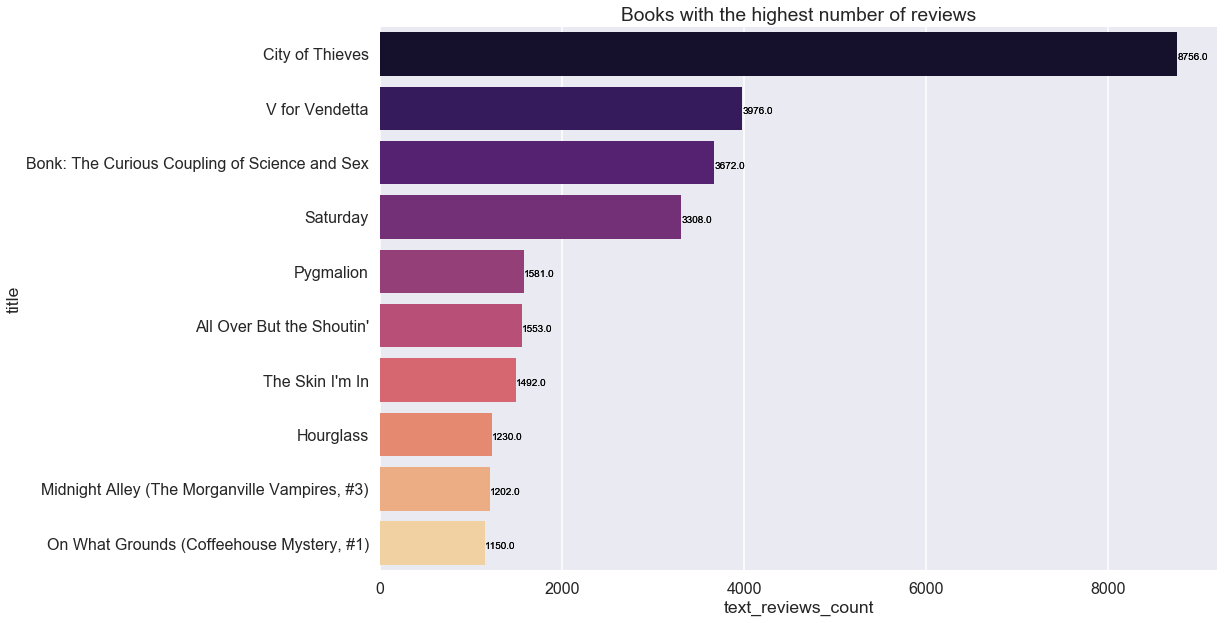

In [25]:
data = pd.read_csv("datav3.csv")
def highest_reviews_books(data):
    '''
    Checking for the books with the highest reviews.
    '''
    most_text = data.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')
    plt.figure(figsize=(15,10))
    sns.set_context('poster')
    ax = sns.barplot(most_text['text_reviews_count'], most_text.index, palette='magma')
    for i in ax.patches:
        ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=10,color='black')
        ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=10,color='black')
    plt.title('Books with the highest number of reviews')
    plt.show()
highest_reviews_books(data)

# Books with the highest ratings_count.
##### QUESTION: Which are the books with highest ratings count? 
##### Answer :

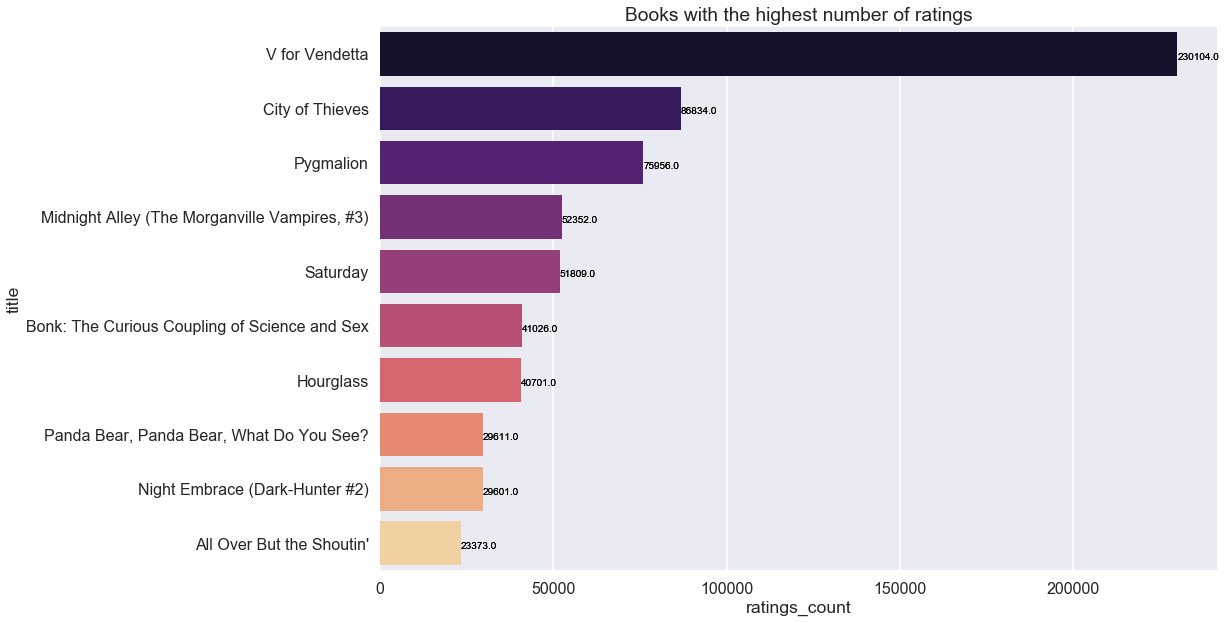

In [24]:
data = pd.read_csv("datav3.csv")
def highest_ratings_count_books(data):
    '''
    Checking for the books with the highest ratings count.
    '''
    most_text = data.sort_values('ratings_count', ascending = False).head(10).set_index('title')
    plt.figure(figsize=(15,10))
    sns.set_context('poster')
    ax = sns.barplot(most_text['ratings_count'], most_text.index, palette='magma')
    for i in ax.patches:
        ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=10,color='black')
        ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=10,color='black')
    plt.title('Books with the highest number of ratings')
    plt.show()
highest_ratings_count_books(data)

# Books with the highest number of pages.
##### QUESTION: Which are the books with highest number of pages? 
##### Answer :

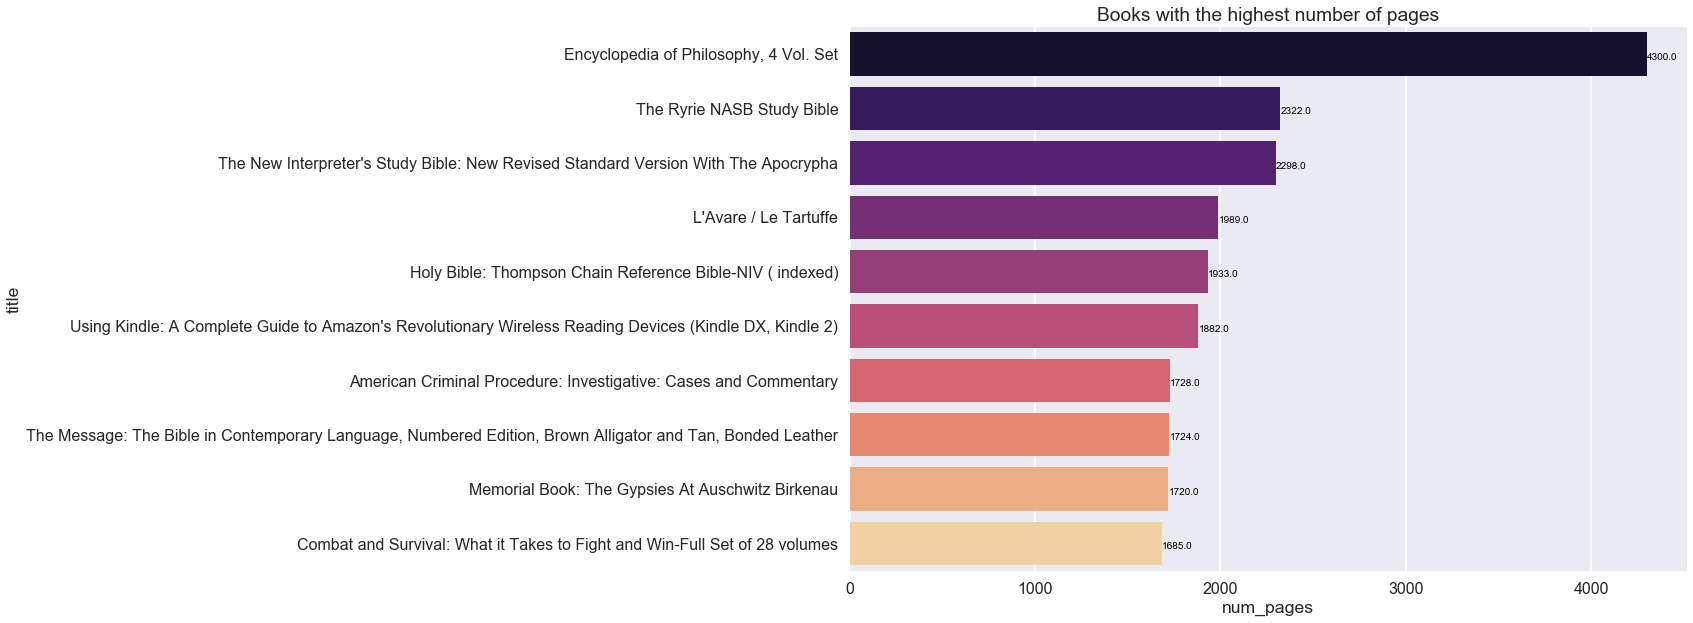

In [23]:
data = pd.read_csv("datav3.csv")
def highest_num_pages_books(data):
    '''
    Checking for the books with the highest number of pages.
    '''
    most_text = data.sort_values('num_pages', ascending = False).head(10).set_index('title')
    plt.figure(figsize=(15,10))
    sns.set_context('poster')
    ax = sns.barplot(most_text['num_pages'], most_text.index, palette='magma')
    for i in ax.patches:
        ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=10,color='black')
    plt.title('Books with the highest number of pages')
    plt.show()
highest_num_pages_books(data)

# Any realtion between author rating and workd count?

##### Answer :

In [ ]:
import csv
from goodreads import client
gc = client.GoodreadsClient('pvr3ns4Le0DCqEpAG2jlQ', '4BM2D4d8ZvFcJNqRQ3OjQq1Qh3OrvMAvHiI0lTOUFE')

def takeSecond(elem):
    return elem[1]

with open('datav3.csv','r',encoding="utf-8") as f:
    reader = csv.reader(f)
    fieldnames = next(reader)
    # print(fieldnames)
    csv_reader = csv.DictReader(f,fieldnames=fieldnames)
    cntAuthor={}
    authoridx={}
    anthortotalrating={}
    for row in csv_reader:
        d={}
        for k,v in row.items():
            d[k]=v
        if d['author'] in cntAuthor:
            cntAuthor[d['author']]+=1
            #print(anthortotalrating[d['author']])
            anthortotalrating[d['author']]+=float(d['rating'])
            
        else:
            cntAuthor[d['author']]=1
            authoridx[d['author']]=d['ID']
            #print(float(d['rating']))
            anthortotalrating[d['author']]=float(d['rating'])
#print(anthortotalrating)
authorratingtuple=[]
for i in cntAuthor:
    if cntAuthor[i]>1:
        authorratingtuple.append((i,round(anthortotalrating[i]/cntAuthor[i],3)))
authorratingtuple.sort(key=takeSecond)
#print(authorratingtuple)
authorwork={}
cnt=0
f=open('authorRatingWork.txt','w')
for i in authorratingtuple:
    cnt+=1
    author = gc.author(gc.book(authoridx[i[0]]).authors[0].gid)
    wk=author.works_count
    print("author:%s     works_count:%s      %s/%s"%(i[0],wk,cnt,len(authorratingtuple)))
    authorwork[i]=wk
    line="%s   %s   %s"%(i[0],i[1],wk)
    f.write(line+"\n")
f.close()

In [ ]:
fl=open('authorRatingWork.txt','r')
for lines in fl.readlines():
    print(lines)
fl.close()

/Users/pioneermaster/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 2880x2160 with 0 Axes>

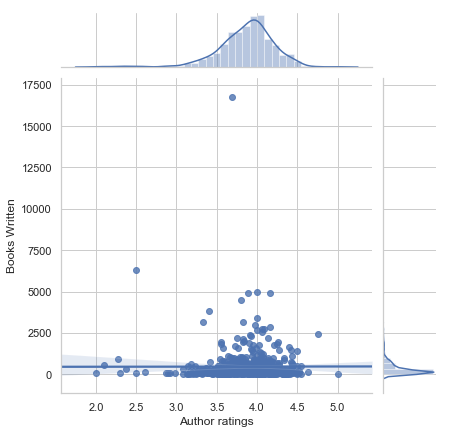

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
xaxis=[]
yaxis=[]
fl=open('authorRatingWork.txt','r')
for lines in fl.readlines():
    templist=lines.split()
    if int(templist[len(templist)-1])<20000:
        xaxis.append(float(templist[len(templist)-2]))
        yaxis.append(float(templist[len(templist)-1]))
'''
plt.bar(xaxis,yaxis,width=0.05)
#xticks(np.arange(0,5, step = 1)) 
plt.title("author rating versus works count",fontsize=16)
plt.xlabel("author rating",fontsize=10)
plt.ylabel("number of books written",fontsize=10)
plt.show()
'''
plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
ls=sns.jointplot(x=xaxis,y=yaxis,kind="reg")
ls.set_axis_labels("Author ratings","Books Written")

In [3]:
data={}
fl=open('authorRatingWork.txt','r')
for lines in fl.readlines():
    templist=lines.split()
    if (float(templist[len(templist)-2])<4.0 and float(templist[len(templist)-1])>5000 and float(templist[len(templist)-1])<20000):
        print(templist)

['National', 'Research', 'Council', '2.5', '6295']
['Walt', 'Disney', 'Company', '3.69', '16766']


In [4]:
import csv
with open('datav3.csv','r',encoding="utf-8") as f:
    reader = csv.reader(f)
    fieldnames = next(reader)
    # print(fieldnames)
    csv_reader = csv.DictReader(f,fieldnames=fieldnames)
    cntAuthor={}
    authoridx={}
    anthortotalrating={}
    cnt=0
    for row in csv_reader:
        d={}
        for k,v in row.items():
            d[k]=v
        if 'Disney' in d['author']:
            print(d['title'])
            cnt+=1
print(cnt)

Lion King Read Along With Book
Mealtime Fun!: Mickey Mouse (Mouseworks Nifty Gifty Book Set)
Peter Pan and Wendy (Disney's Wonderful World of Reading)
La Sirenita: Busca y Encuentra (Look and Find)
4


# How many books do top ten rated authors wrote?

##### Answer :

['Sydelle', 'Kramer', '2.0', '50']
['Richard K. Nongard', 'Charles Haddon Spurgeon', 'Hafez', 'Dorothy Dunnett', 'William Wordsworth', 'Ivo Andrić', 'Vicki Lansky', 'Plutarch', 'Margaret Storey', 'William Blake']
[19, 2453, 151, 32, 503, 181, 62, 1419, 28, 481]
[5.0, 4.76, 4.63, 4.545, 4.545, 4.523, 4.52, 4.5, 4.5, 4.495]


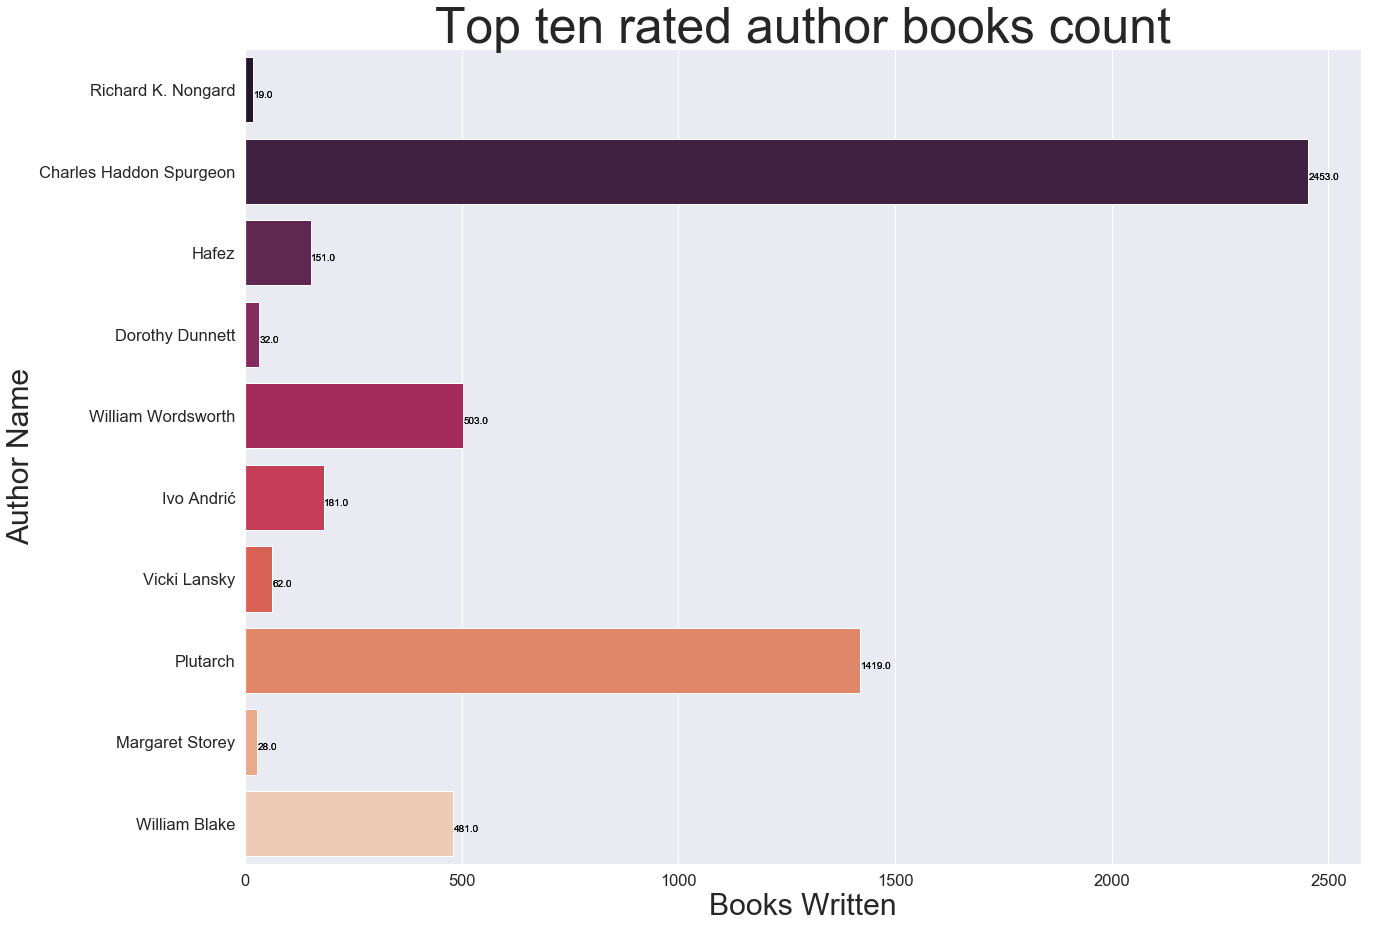

In [6]:
fl=open('authorRatingWork.txt','r')
lines=fl.readlines()
xx=[]
yy=[]
zz=[]
print(lines[0].split())
a=lines[0].split()
for i in range(1,11):
    ll=lines[len(lines)-i].split()
    aut=''
    for j in ll[0:len(ll)-2]:
        aut+=j
        aut+=' '
    xx.append(aut.rstrip())
    yy.append(int(ll[len(ll)-1]))
    zz.append(float(ll[len(ll)-2]))
print(xx)
print(yy)
print(zz)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
ls=sns.barplot(yy,xx,palette='rocket')
ls.set_xlabel("Books Written",fontsize=30)
ls.set_ylabel("Author Name",fontsize=30)
ls.set_title("Top ten rated author books count",fontsize=50)
for i in ls.patches:
        ls.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=10,color='black')
        ls.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=10,color='black')
fl.close()

# what are the ratings of top ten rated authors?

##### Answer :

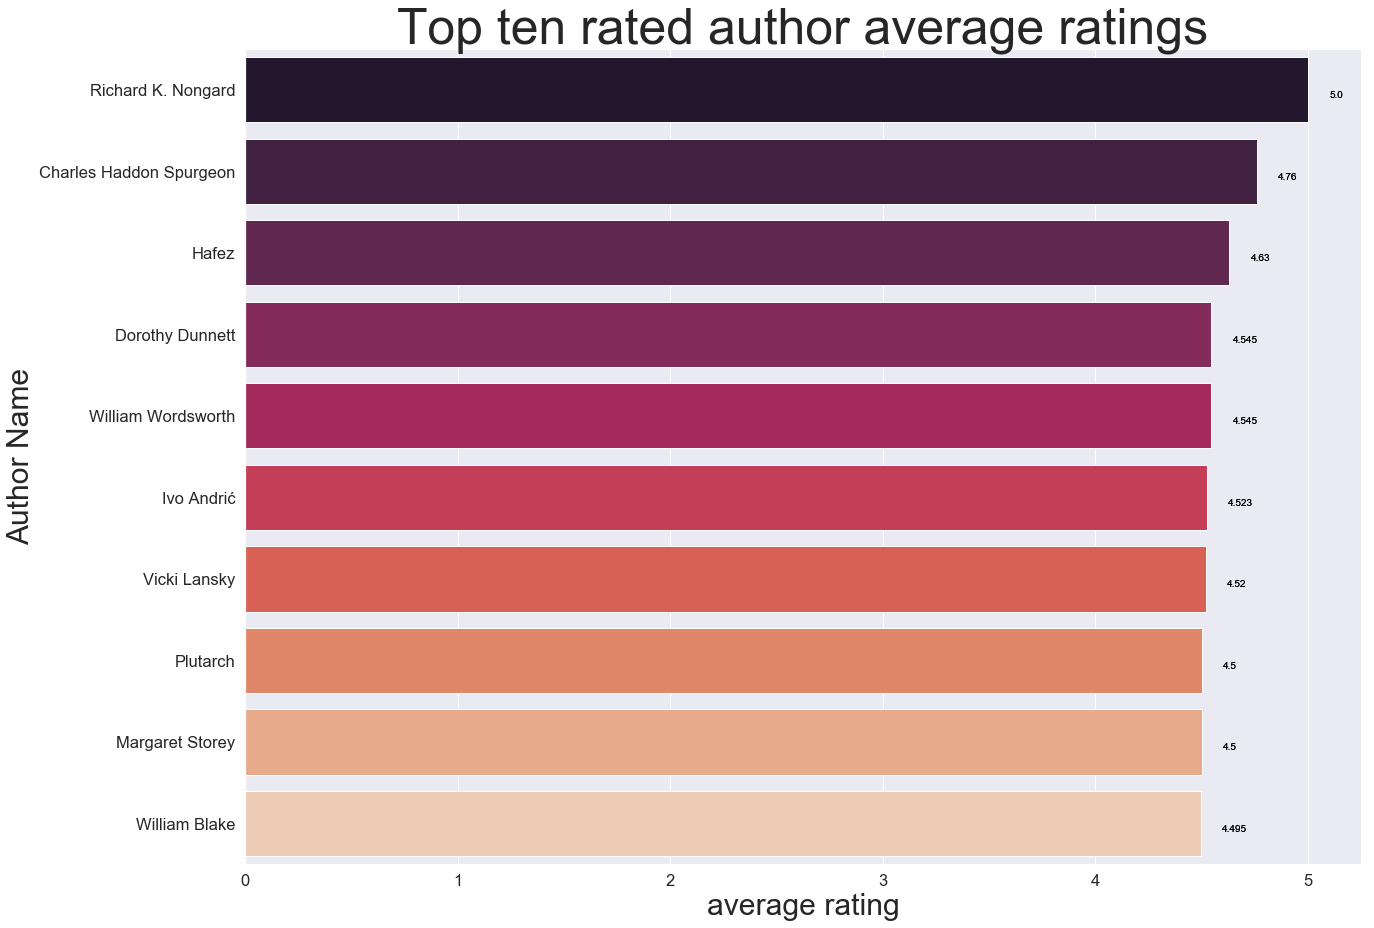

In [7]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,15))
xs=sns.barplot(zz,xx,palette='rocket')
xs.set_xlabel("average rating",fontsize=30)
xs.set_ylabel("Author Name",fontsize=30)
xs.set_title("Top ten rated author average ratings",fontsize=50)
for i in xs.patches:
        xs.text(i.get_width()+0.1, i.get_y()+0.5,str(i.get_width()), fontsize=10,color='black')
        xs.text(i.get_width()+0.1, i.get_y()+0.5,str(i.get_width()), fontsize=10,color='black')

# corelation between ratings and author dead?

##### Answer :

In [ ]:
import csv
from goodreads import client
gc = client.GoodreadsClient('pvr3ns4Le0DCqEpAG2jlQ', '4BM2D4d8ZvFcJNqRQ3OjQq1Qh3OrvMAvHiI0lTOUFE')

def takeSecond(elem):
    return elem[1]

dsum=0
dcnt=0
asum=0
acnt=0
with open('datav3.csv','r',encoding="utf-8") as f:
    reader = csv.reader(f)
    fieldnames = next(reader)
    # print(fieldnames)
    csv_reader = csv.DictReader(f,fieldnames=fieldnames)
    cntAuthor={}
    authoridx={}
    anthortotalrating={}
    cntc=0
    for row in csv_reader:
        cntc+=1
        if cntc==3000:
            break
        d={}
        for k,v in row.items():
            d[k]=v
        bookidx=d['ID']
        author = gc.author(gc.book(bookidx).authors[0].gid)
        wk=author.died_at
        if wk==None:
            acnt+=1
            asum+=float(d['rating'])
        else:
            dcnt+=1
            dsum+=float(d['rating'])
        print("index:%s    acnt:%s dcnt:%s "%(cntc,acnt,dcnt))

f=open('ratingalive.txt','w')
f.write("acnt:%s dcnt:%s"%(acnt,dcnt))
f.write("asum:%s dsum:%s"%(asum,dsum))
f.close()
print("dead author average rating:%s"%dsum/dcnt)
print("live author average rating:%s"%asum/acnt)

In [ ]:
print(float(dsum)/float(dcnt))
print(float(asum)/float(acnt))

Text(0,3.9,'3.89')

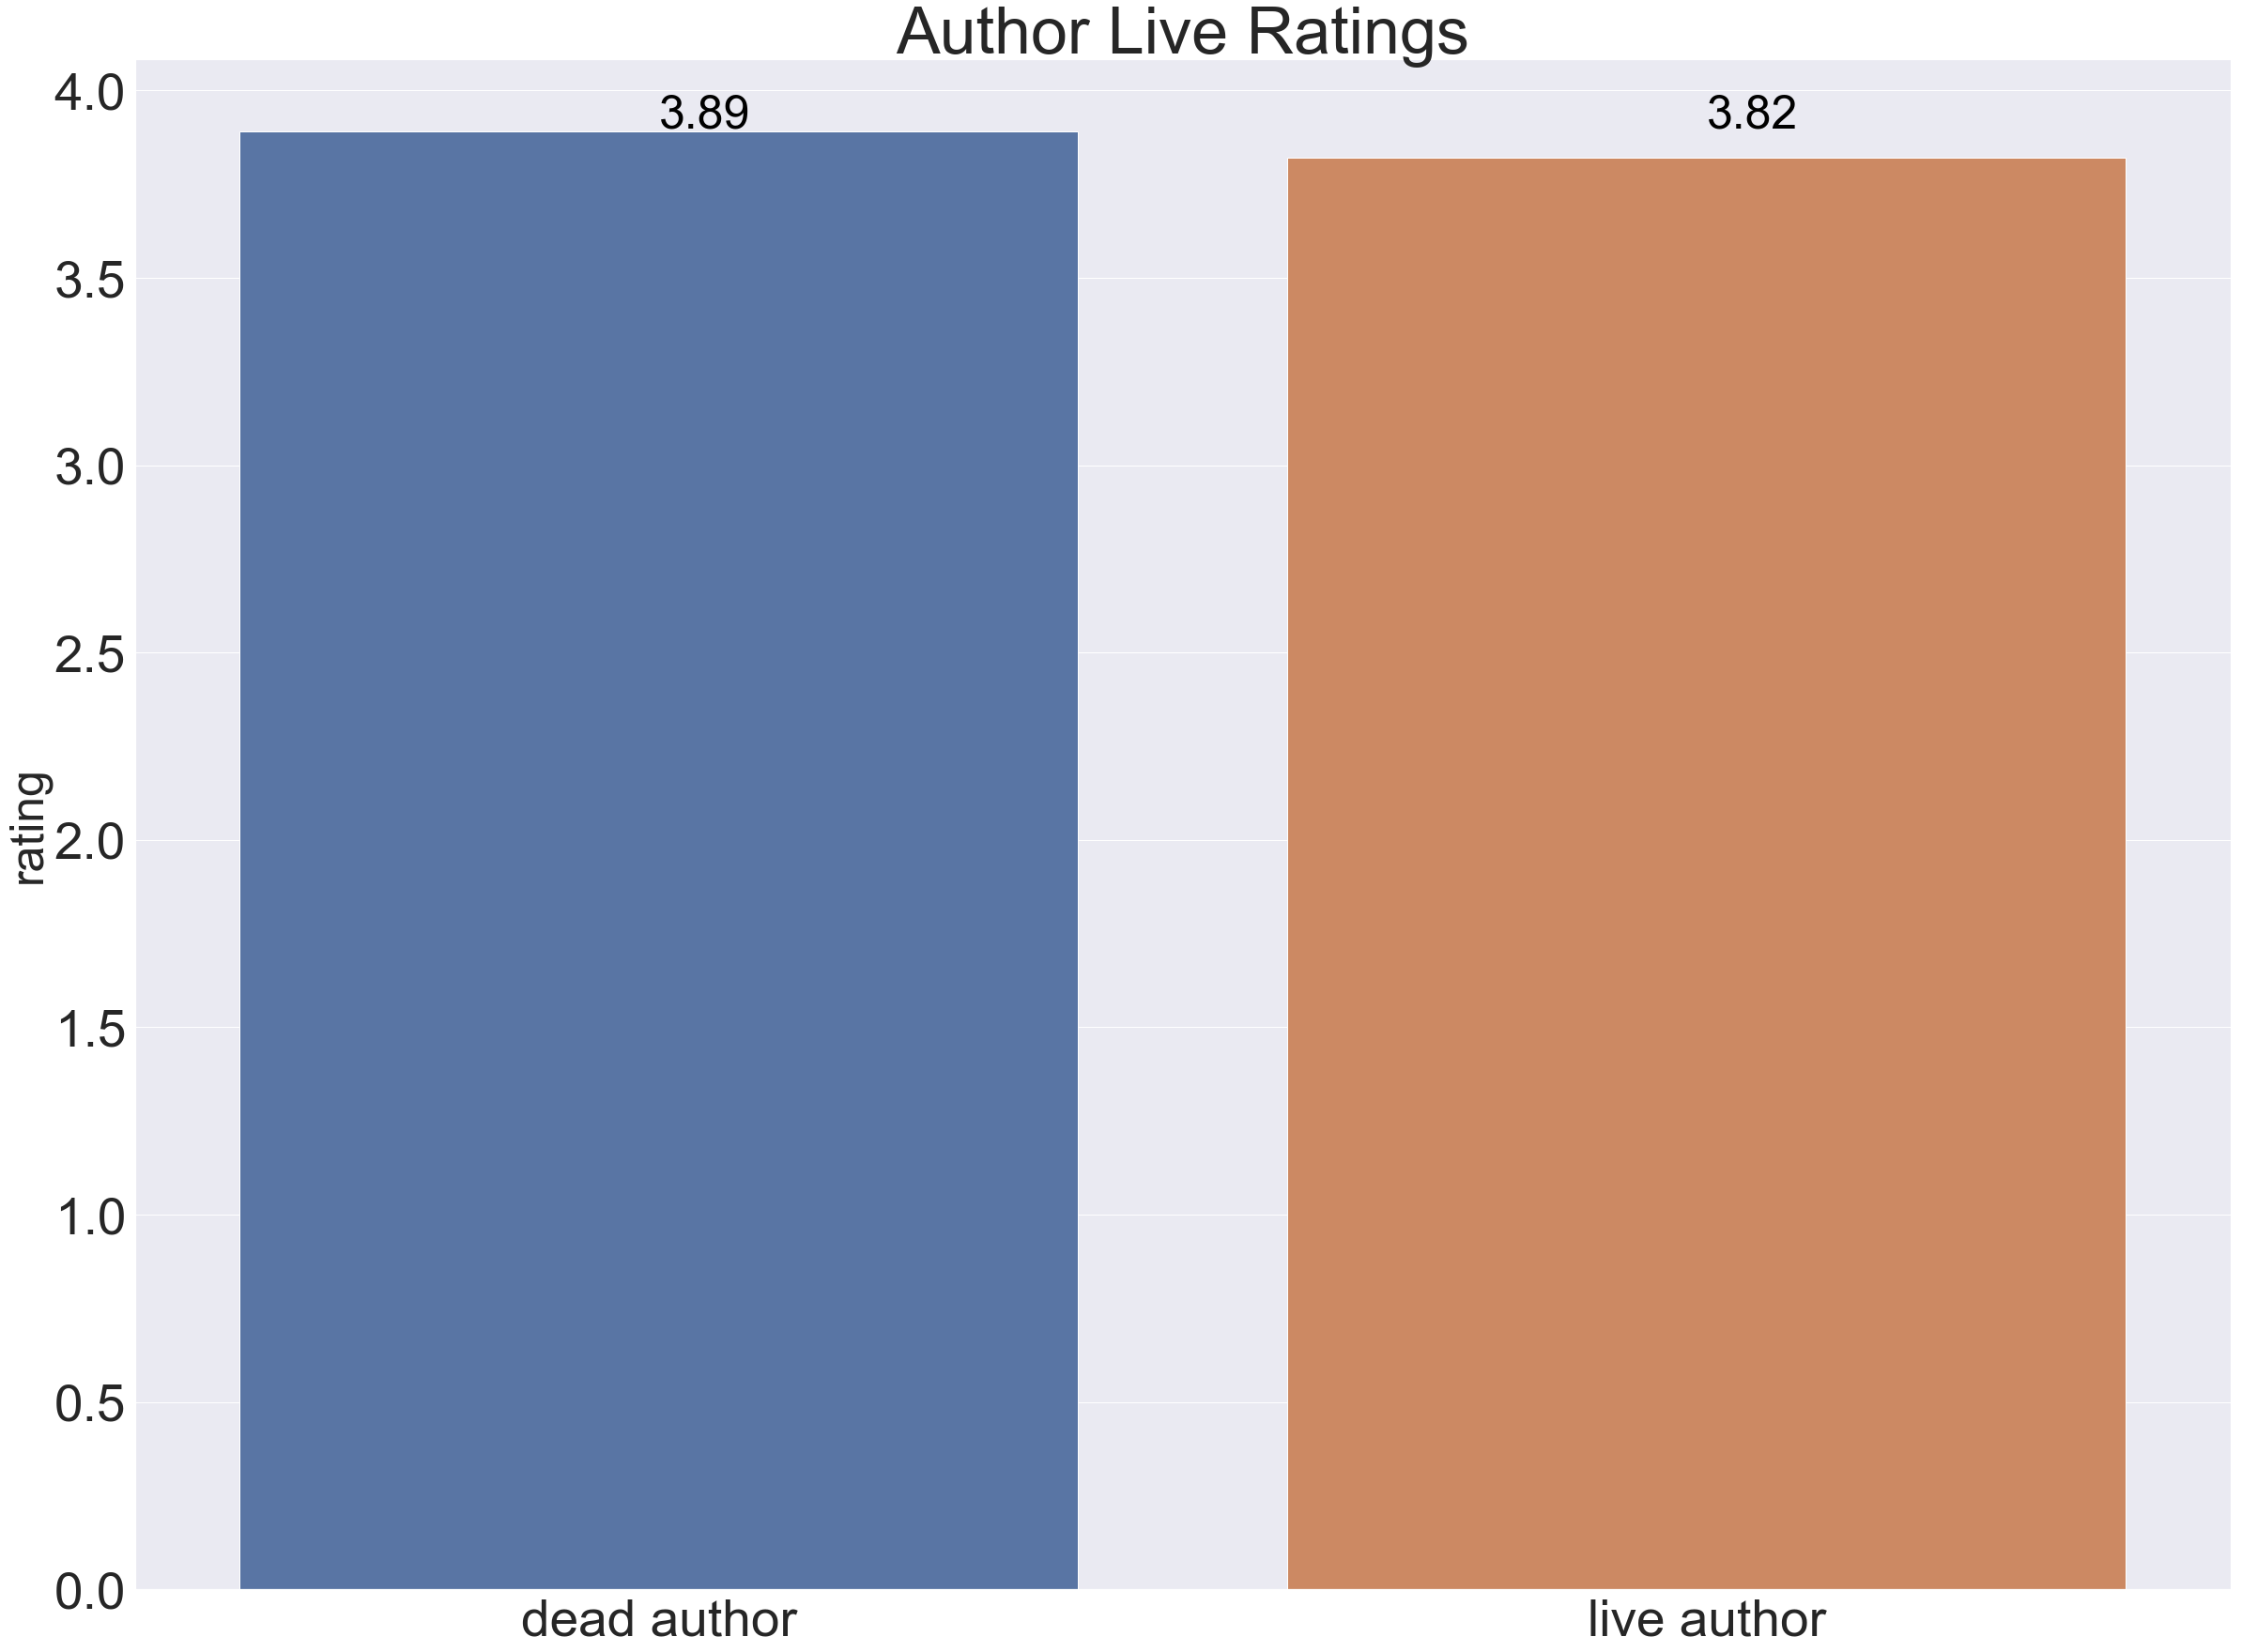

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
b=['dead author','live author']
a=[3.89,3.82]
sns.set(font_scale=5)
plt.figure(figsize=(40,30))
ls=sns.barplot(b,a)
ls.set_ylabel("rating",fontsize=50)
ls.set_title("Author Live Ratings",fontsize=70)
sns.set(style="whitegrid")
ls.text(1,3.9,3.82, fontsize=50,color='black')
ls.text(0,3.9,3.89, fontsize=50,color='black')

# corelation between ratings and author fanscount?

##### Answer :

In [ ]:
import csv
from goodreads import client
gc = client.GoodreadsClient('pvr3ns4Le0DCqEpAG2jlQ', '4BM2D4d8ZvFcJNqRQ3OjQq1Qh3OrvMAvHiI0lTOUFE')

def takeSecond(elem):
    return elem[1]

xx=[]
yy=[]
with open('datav3.csv','r',encoding="utf-8") as f:
    reader = csv.reader(f)
    fieldnames = next(reader)
    # print(fieldnames)
    csv_reader = csv.DictReader(f,fieldnames=fieldnames)
    cntAuthor={}
    authoridx={}
    anthortotalrating={}
    cntc=0
    for row in csv_reader:
        cntc+=1
        if cntc==300:
            break
        d={}
        for k,v in row.items():
            d[k]=v
        bookidx=d['ID']
        author = gc.author(gc.book(bookidx).authors[0].gid)
        fanscnt=author.fans_count()
        print("author:%s   fanscnt:%s  %s" %(d['author'],fanscnt['#text'],cntc))
        xx.append(d['rating'])
        yy.append(fanscnt)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
xxx=[]
yyy=[]
for i in xx:
    xxx.append(float(i))
for j in yy:
    yyy.append(int(j['#text']))

plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
ls=sns.jointplot(x=xxx,y=yyy,kind="reg")
ls.set_axis_labels("rating","fanscnt")

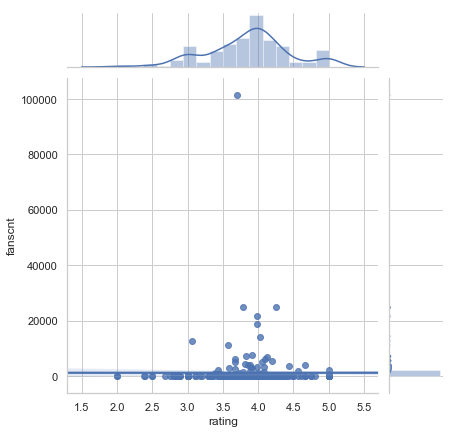